In [141]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from google.cloud import vision
from sklearn.metrics import accuracy_score

In [245]:
data = []
labels = []
classes = 7
cur_dir = os.getcwd()
print(cur_dir)

E:\SiH-Frame-Demo\Currency count


In [246]:
for i in range(classes):
    path = os.path.join(cur_dir,'training',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading images")

data = np.array(data)
labels = np.array(labels)

In [247]:
print(data.shape,labels.shape)
X_train,X_test,Y_train,Y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)

(579, 30, 30, 3) (579,)
(463, 30, 30, 3) (116, 30, 30, 3) (463,) (116,)


In [227]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [248]:
epochs = 50
histroy = model.fit(X_train,Y_train,batch_size = 64, epochs = epochs , validation_data=(X_test,Y_test))

Train on 463 samples, validate on 116 samples
Epoch 1/50
463/463 [==============================] - 4s 9ms/step - loss: 0.4582 - accuracy: 0.8207 - val_loss: 0.8974 - val_accuracy: 0.7672
Epoch 2/50
463/463 [==============================] - 2s 5ms/step - loss: 0.4200 - accuracy: 0.8445 - val_loss: 0.9970 - val_accuracy: 0.7328
Epoch 3/50
463/463 [==============================] - 2s 5ms/step - loss: 0.4054 - accuracy: 0.8380 - val_loss: 0.8756 - val_accuracy: 0.7500
Epoch 4/50
463/463 [==============================] - 2s 5ms/step - loss: 0.4057 - accuracy: 0.8575 - val_loss: 0.9954 - val_accuracy: 0.6897
Epoch 5/50
463/463 [==============================] - 2s 5ms/step - loss: 0.4663 - accuracy: 0.8207 - val_loss: 0.9129 - val_accuracy: 0.7500
Epoch 6/50
463/463 [==============================] - 2s 5ms/step - loss: 0.3832 - accuracy: 0.8618 - val_loss: 1.0261 - val_accuracy: 0.7500
Epoch 7/50
463/463 [==============================] - 2s 5ms/step - loss: 0.3447 - accuracy: 0.8639 - 

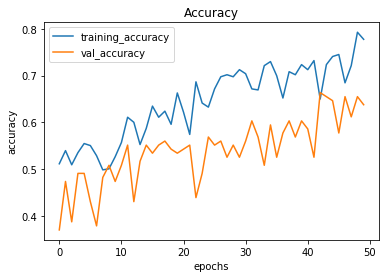

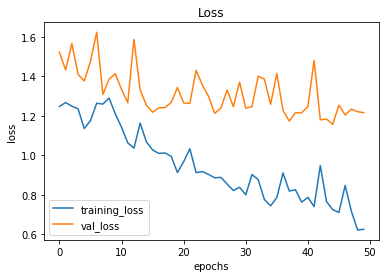

In [10]:
plt.figure(0)
plt.plot(histroy.history['accuracy'],label='training_accuracy')
plt.plot(histroy.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(1)
plt.plot(histroy.history['loss'],label='training_loss')
plt.plot(histroy.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

In [256]:
df = pd.DataFrame(columns=['index','path'])
index_value = []

In [257]:
for i in range(classes):
    path = os.path.join(cur_dir,'validation',str(i))
    images = os.listdir(path)
    for a in images:
        index_value.append(i)
        df = df.append(dict(
            index = i,
            path = 'validation\\'+str(i)+str('\\')+str(a)
        ),ignore_index=True)

In [258]:
image = df['path']
label = df['index']
data=[]

In [259]:
X_test = []
data = []
for img in image:
    #print(img)
    imag = Image.open(os.path.join(cur_dir,img))    
    imag = imag.resize((30,30))
    imag = np.array(imag)
    data.append(imag)


In [260]:
datas =[]
labels_value=[]
j=0
remove_index = []
for i in data:
    if (i.shape == (30,30,3)):
        datas.append(i)
        j=j+1
    else:
        remove_index.append(j)
        j=j+1

In [261]:
X_test=np.array(datas)

In [262]:
for u in remove_index:
    index_value.pop(u)
print(label.count())

167


In [263]:
pred = model.predict_classes(X_test)

In [264]:
index_value = np.array(index_value)

In [265]:
print(accuracy_score(index_value, pred))

0.9024390243902439


In [266]:
model.save('currency_classifier.h5')